#                          DECISION TREE



* it is one of the most algorithm
* it is a supervised learning technique
* it can be used for both classification and regression
* it is a tree structure classifier



# *


* it has if_else rules based conditions of given data
* internal nodes represent the features of dataset
* branches represents the decision rules
* leaf node represent the outcome
* basically we have 2 nodes in decision tree:
* 1.decision node
* 2. leaf node : it is an output node it doesnot contain any further branches
* both nodes are used to make any decisions
* INORDER TO BUILT THE DECISION TREE ALGORITHM WE USE CART : it stands for cassification and regression tree algorithm


#   why we use the decision tree algorithm

* decision tree is AI application
* mimic of human thinking ability while aking a decision tree like structure


#        TERMINOLOGIES


# 1.root node: 
* it is a parent or child node
* it is where the decision tree starts it represents the entire data which further gets divided into 2 or more homogeneous datasets.
# 2. LEAF NODE:
* final output node
* and tree can,t be seggregated further after getting leaf nodes
# 3.splitting:
* it is the process of dividing the  decision node  or root node into sub nodes according to the given condition 

# 4. branch or subtree:
* a tree formed by splitting the tree is called subtree
* the root node of the tree called parent node
* other nodes called leaf node
# 5.pruning:
* it is the process of removing the unwanted branches from the tree 

# how does the decision tree algorithm works


# step 1:
* algorithm always starts from root node

# step 2 :
* begin the tree with root node (S) contains complete dataset

# step 3 :
* find the best attribute in the dataset using asm : attribute measureemnt selection

# step 4:
* divides the (S) into subsets that contains possible values for best attribute 
# step 5:
* generate the decision tree nodes which contains the best attribute 


# step 6:


* recursively make a new decision tree using the subset 3 
* continue this step until the a stage is raeched where u cant classified the nodes
* its called final node as leaf node

#           ASM : attribute selection measurement


* with the help of asm we can easiy select attributes
* asm is divided into 2 types:

# 1. information gain
# 2.gini index

# how to choose the asm of given data


* it is the measurement of changes in entropy after the segmentation of the dataset based on attributes
* how much amount of information does each variable contributing to the model



# i.g= entropy at the root node - sum of weighted entropy at each child node 


# entropy: it measures the impurity of   a dataset  
* its range is 0 to 1 
* if entropy is close to 0 its a pure node
* if entropy is close to 1 the its a impure node

# gini index: its a measure of purity or impurity used whole craeting a decsion tree in the CART

* an attribute with low gini index shold be returned as compared with the high gini index 



In [1]:
import pandas as pd
import numpy as np
import os
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
dt=pd.read_csv(r"E:\ds course\data sets\data sets from kaggle\decision_tree.csv")

In [3]:
dt.shape

(1372, 5)

In [4]:
dt.head(2)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
dt.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
# there is no null values in the data set

dt.isnull().values.any()   


False

C:\Users\harid\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


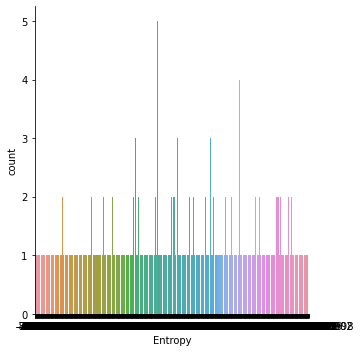

In [10]:
sbn.factorplot("Entropy",data=dt,kind="count")

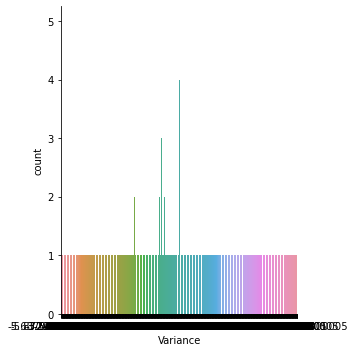

In [11]:
sbn.factorplot("Variance",data=dt,kind="count")

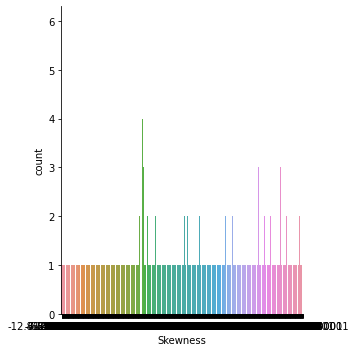

In [12]:
sbn.factorplot("Skewness",data=dt,kind="count")

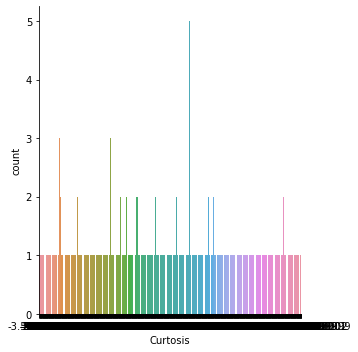

In [13]:
sbn.factorplot("Curtosis",data=dt,kind="count")

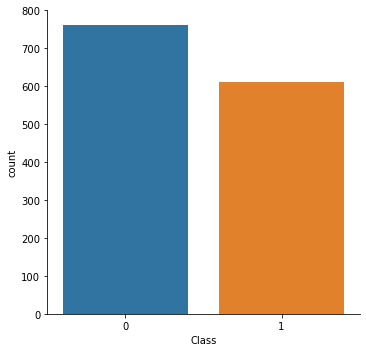

In [14]:
sbn.factorplot("Class",data=dt,kind="count")

In [15]:
dt.keys()

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

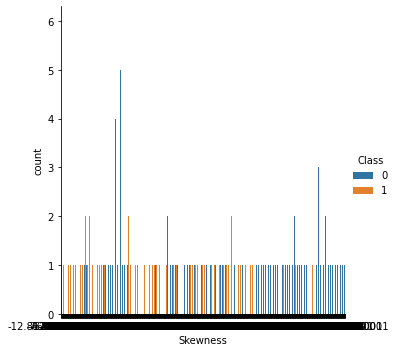

In [16]:
sbn.factorplot("Skewness",data=dt,hue="Class",kind="count")

In [29]:
x=dt.iloc[:,[0,1,2,3]]
y=dt.iloc[:,[4]]

In [30]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [31]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [32]:
# spitting the data into 2 parts by using train_test_spit train part is 80% and test part is 20%
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
len(x_train)

1097

In [38]:
len(x_test)

275

In [39]:
# feature scaling

from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [45]:
# fitting the decision tree classifier to training set

from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

# if the difference between training accuracy and test accuracy is more than 10% then it is called over fitting


# less than 10% it's called under fitting

In [47]:
classifier.score(x_train,y_train)

1.0

In [48]:
classifier.score(x_test,y_test)

0.9818181818181818